In [ ]:
Data Wrangling

Investigate No-show appointment dataset project
Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program 'Bolsa Família'.
  Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if     they did not show up.
  
we are going to know What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load  data and print out a few lines.
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head(8)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes


In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missed values

In [6]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The mean age is about 37 years.
There is a mistake that the minimum age is (-1) year .

### Data Cleaning 

In [7]:
#maybe we don't need patient Id ,appointment ID ,scheduled day and Appointment day in our data ,so we can drop them 
df.drop(['PatientId' , 'AppointmentID' , 'ScheduledDay' , 'AppointmentDay'], axis =1 ,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#correct the false values of Age
df['Age'].replace(-1,0 ,inplace= True)

In [9]:
#rename no-show column to no_show
df.rename(columns={'No-show' : 'No_show'},inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
#rename Hipertension column to Hypertension as there is a mistake in the spelling
df.rename(columns={'Hipertension' : 'Hypertension'},inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### General Look

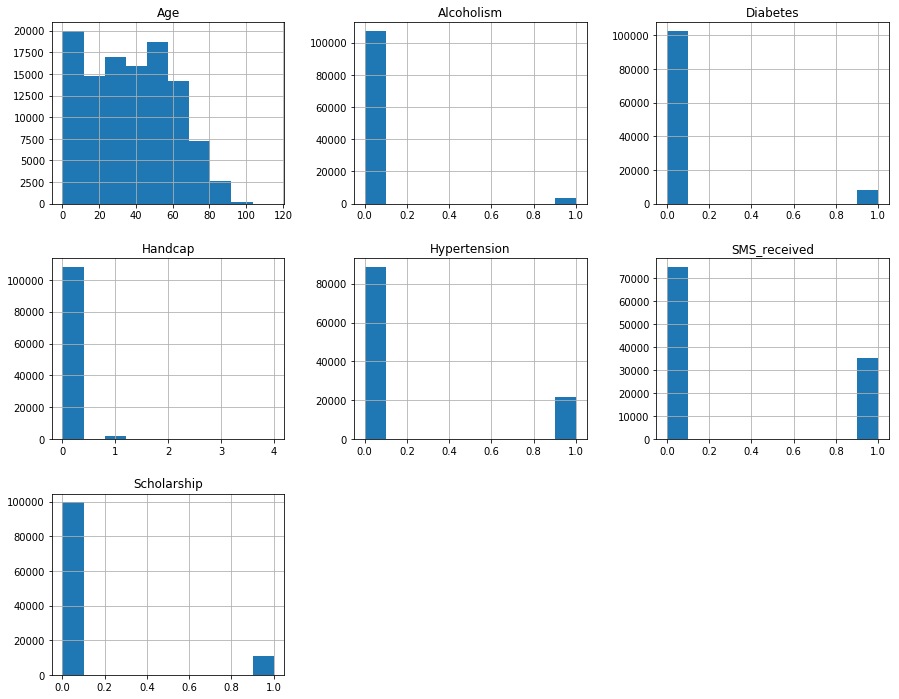

In [11]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# histogram of dataset
df.hist(figsize=(15,12));   

- Patients who recieved SMS are about half tp those who didn't 
- A lot of patients didn't suffer from diabetes 
- About 95% of patients aren't handcaped 
- About 8% of patients are enrolled in Brazilian scholarship program

In [12]:
#assigning names to show and noshow 
show = df. No_show =='No'
noshow = df. No_show =='Yes'


In [13]:
df[show].count()

Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hypertension     88208
Diabetes         88208
Alcoholism       88208
Handcap          88208
SMS_received     88208
No_show          88208
dtype: int64

In [14]:
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

### Another Data Analysis

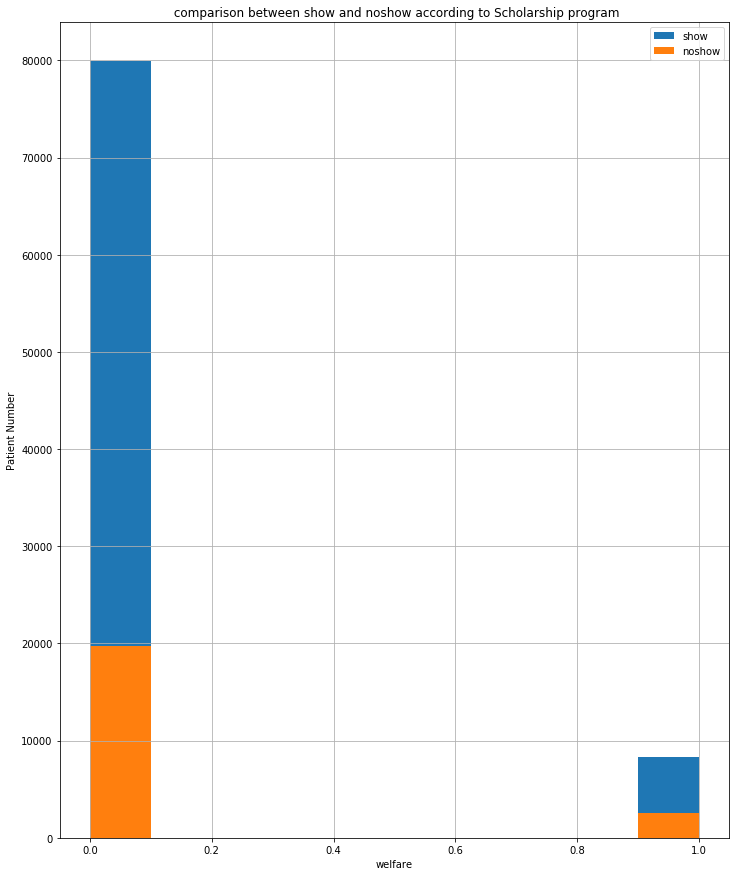

In [15]:
#compare between show and noshow according to Scholarship program
plt.figure(figsize=[12,15])
df.Scholarship[show].hist(label='show')
df.Scholarship[noshow].hist(label='noshow')
plt.legend()
plt.title(' comparison between show and noshow according to Scholarship program')
plt.xlabel('welfare')
plt.ylabel('Patient Number');

In [16]:
print (df.Scholarship[show].value_counts())
print (df.Scholarship[noshow].value_counts())

0    79925
1     8283
Name: Scholarship, dtype: int64
0    19741
1     2578
Name: Scholarship, dtype: int64


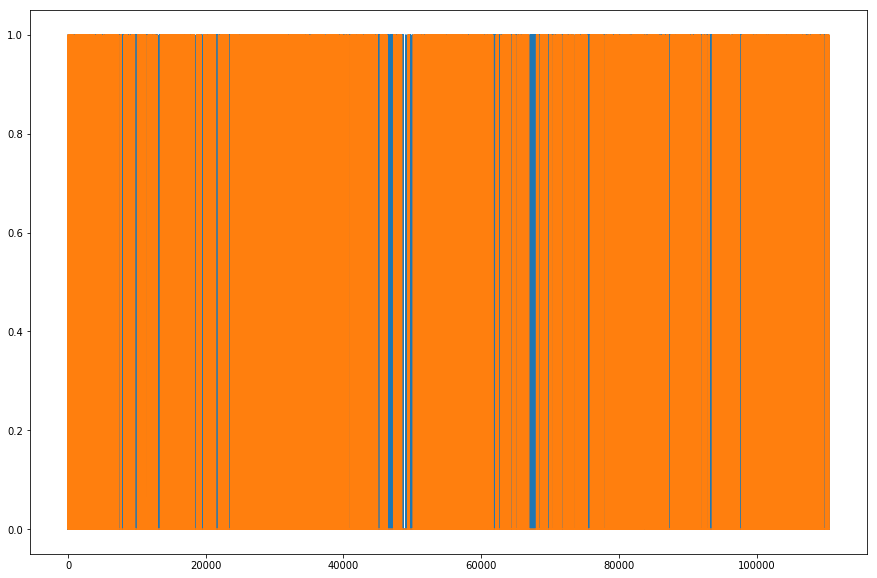

In [31]:
df.Scholarship[show].plot(figsize=(15,10)); 
df.Scholarship[noshow].plot(figsize=(15,10));

The average of those who attended and others who didn't is too close according to the histogram .

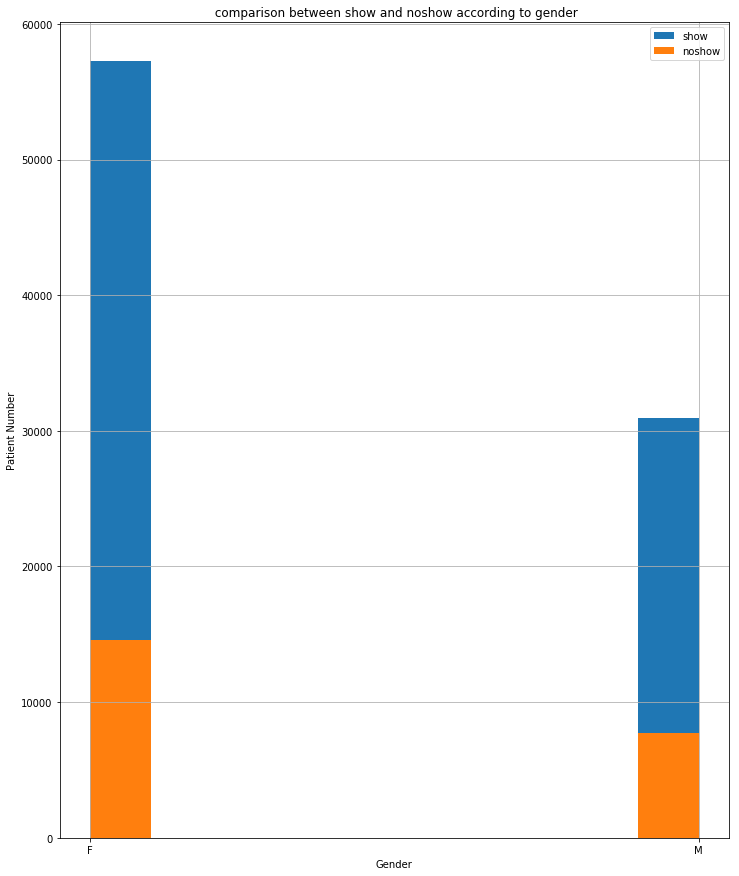

In [32]:
#compare between show and noshow according to gender
plt.figure(figsize=[12,15])
df.Gender[show].hist(label='show')
df.Gender[noshow].hist(label='noshow')
plt.legend()
plt.title(' comparison between show and noshow according to gender')
plt.xlabel('Gender')
plt.ylabel('Patient Number');

In [33]:
print (df.Gender[show].value_counts())
print (df.Gender[noshow].value_counts())

F    57246
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


Gender is insignificant as both females who show and not show are more than males

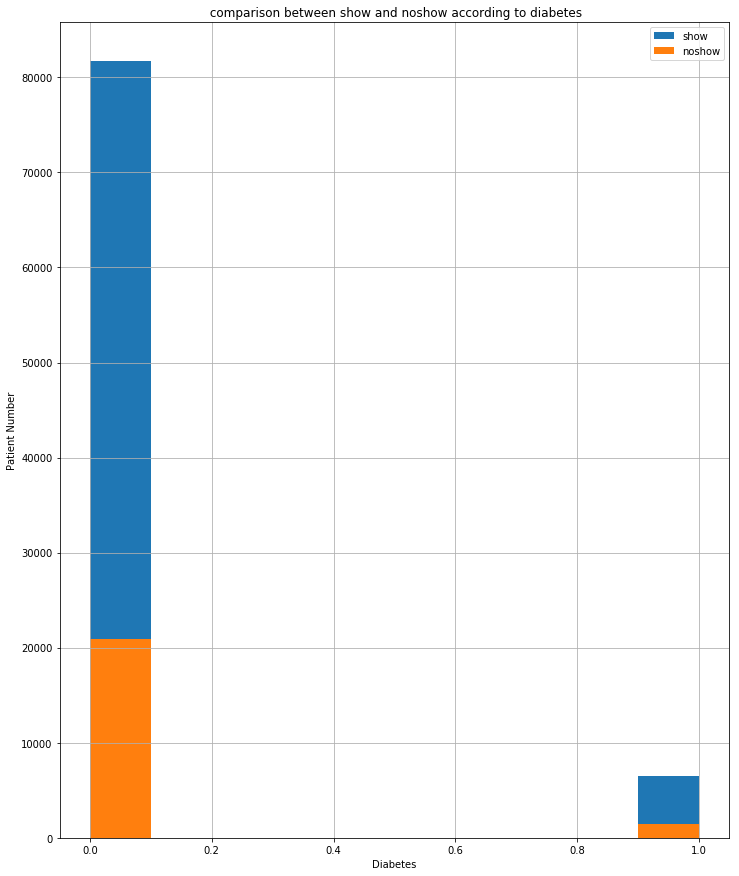

In [35]:
# compare show and noshow according to diabetes
plt.figure(figsize=[12,15])
df.Diabetes[show].hist(label='show')
df.Diabetes[noshow].hist(label='noshow')
plt.legend()
plt.title(' comparison between show and noshow according to diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Patient Number');

In [36]:
print (df.Diabetes[show].value_counts())
print (df.Diabetes[noshow].value_counts())

0    81695
1     6513
Name: Diabetes, dtype: int64
0    20889
1     1430
Name: Diabetes, dtype: int64


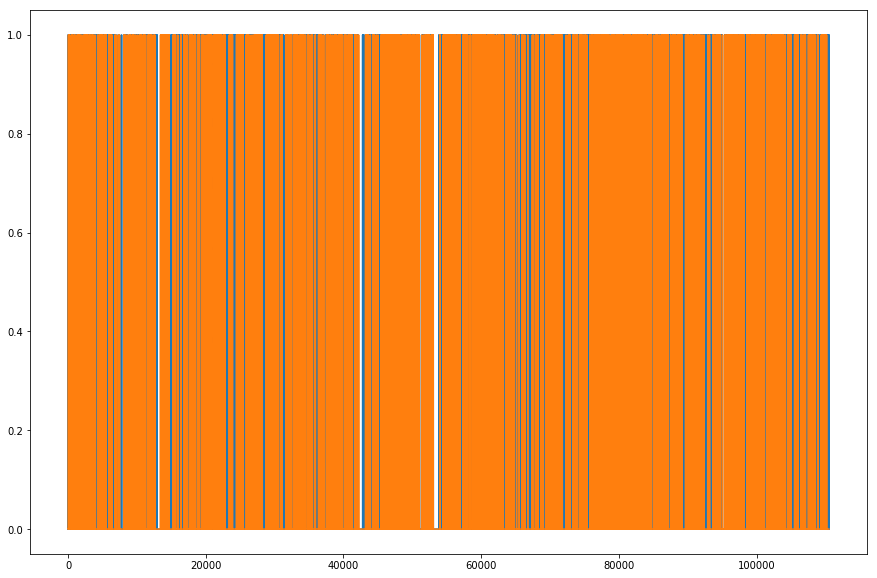

In [37]:
df.Diabetes[show].plot(figsize=(15,10)); 
df.Diabetes[noshow].plot(figsize=(15,10));

Diabetes is insignificant

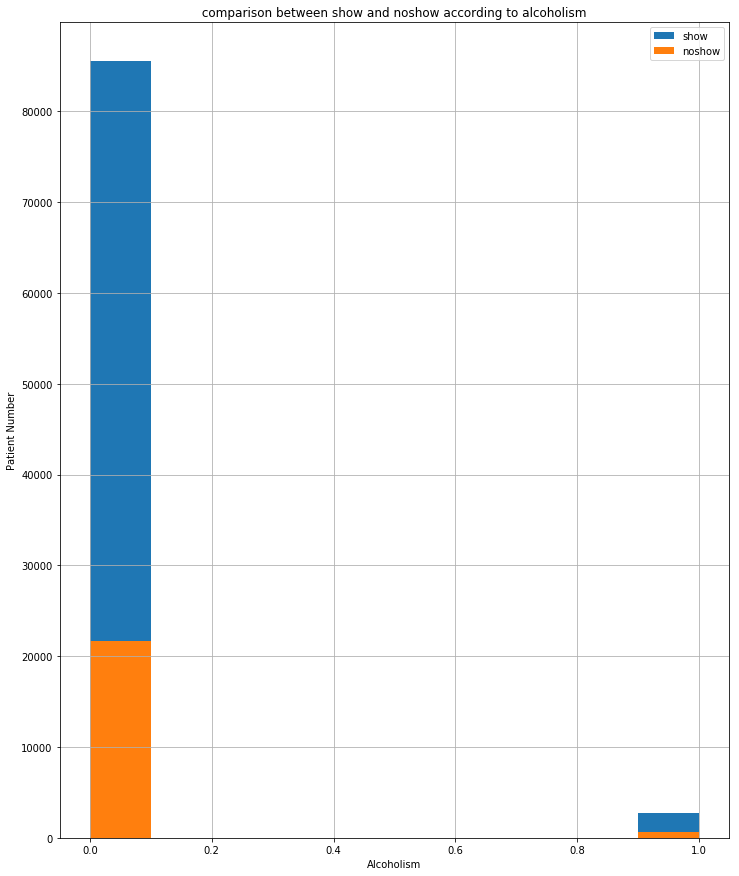

In [38]:
# compare show and noshow according to alcoholism
plt.figure(figsize=[12,15])
df.Alcoholism[show].hist(label='show')
df.Alcoholism[noshow].hist(label='noshow')
plt.legend()
plt.title(' comparison between show and noshow according to alcoholism ')
plt.xlabel('Alcoholism')
plt.ylabel('Patient Number');

In [39]:
print (df.Alcoholism[show].value_counts())
print (df.Alcoholism[noshow].value_counts())

0    85525
1     2683
Name: Alcoholism, dtype: int64
0    21642
1      677
Name: Alcoholism, dtype: int64


Alcoholism is insignificant

In [40]:
# compare show and noshow according to sms recieved


In [ ]:
df.SMS_recieved[show].plot(figsize=(15,10)); 
df.SMS_recieved[noshow].plot(figsize=(15,10));

Patients who received SMS are less than who didn't receive and that is strange

In [ ]:
# compare show and noshow according to age
plt.figure(figsize=[12,15])
df.Age[show].hist(label='show')
df.Age[noshow].hist(label='noshow')
plt.legend()
plt.title(' comparison between show and noshow according to age')
plt.xlabel('Age')
plt.ylabel('Patient Number');

In [43]:
print (df.Age[show].value_counts())
print (df.Age[noshow].value_counts())

0      2901
1      1858
52     1449
56     1372
2      1366
59     1357
49     1354
53     1332
57     1325
50     1322
38     1309
51     1284
54     1262
3      1236
36     1236
58     1216
37     1216
6      1205
34     1204
45     1198
39     1196
63     1195
46     1177
33     1176
60     1175
32     1174
5      1169
55     1168
44     1164
30     1152
       ... 
72      514
74      513
76      480
75      463
78      452
77      448
80      430
81      371
79      329
82      326
84      276
85      226
83      219
86      218
87      157
89      144
88      114
90       86
92       66
91       53
93       43
94       27
95       18
96       16
97        9
98        5
100       4
102       2
115       2
99        1
Name: Age, Length: 103, dtype: int64
0      639
1      415
17     396
19     394
30     369
9      364
20     355
21     355
16     353
25     352
22     351
18     350
33     348
36     344
23     343
39     340
28     332
32     331
29     330
27     329
44     323


- Patients whose ages are less than 10 are shown more than others .
- Patients whose ages are between 10 and 50 are quitely shown but not too much .
- Patients whose ages are between 50 and 60 are shown quitely like those whose ages are less than 10  .
- Patients whose ages are more than 60 are shown less than others .

ValueError: could not convert string to float: 'ILHAS OCEÂNICAS DE TRINDADE'

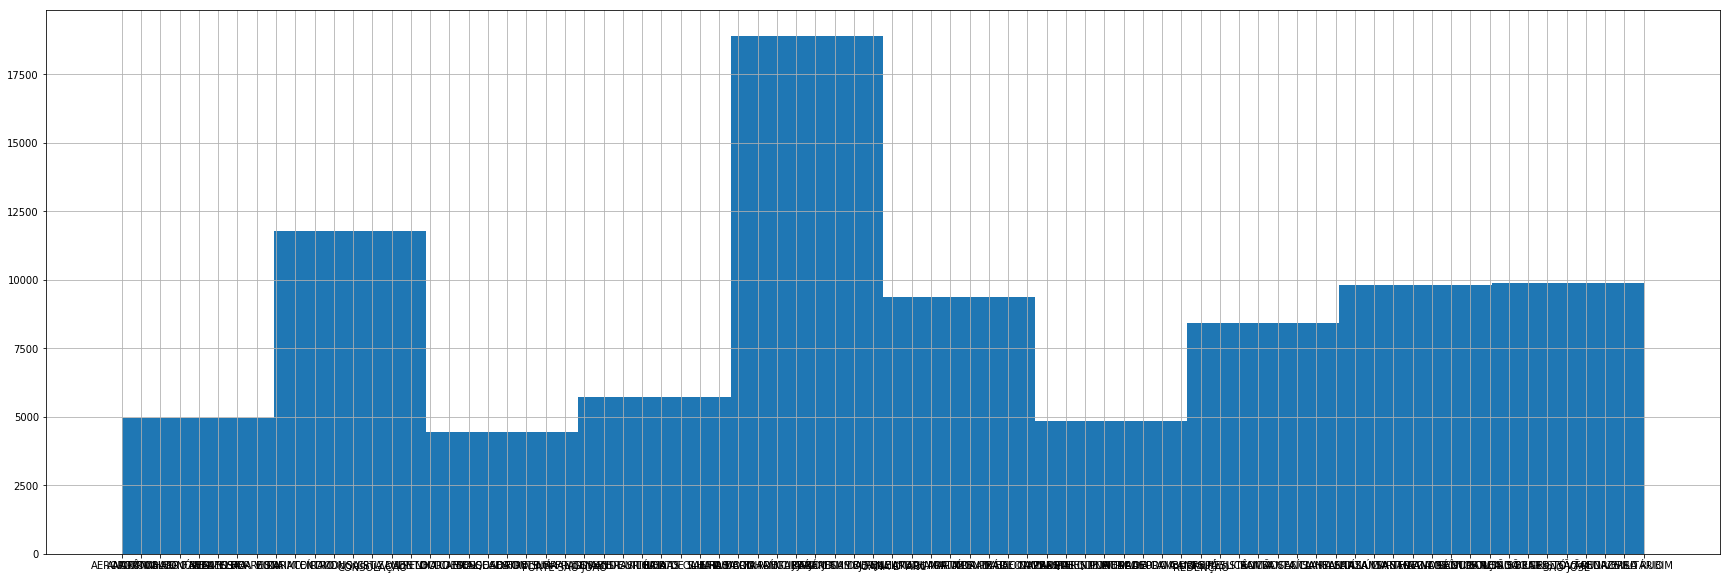

In [47]:
#compare between show and noshow according to neighbourhood
plt.figure(figsize=[30,10])
df.Neighbourhood[show].hist(label='show')
df.Neighbourhood[noshow].hist(label='noshow')
plt.legend()
plt.title(' comparison between show and noshow according to neighbourhood') 
plt.xlabel('Neighbourhood')
plt.ylabel('Patient Number');

In [ ]:
print (df.Neighbourhood[show].value_counts())
print (df.Neighbourhood[noshow].value_counts())

It seems that Neighbourhooh affects patients' show strongly 
The nearest cities are showed more than the furthest

<a id='conclusions'></a>
## Conclusions

At the end of my analysis
- I think Neighbourhood affects on Patient Showing strongly ,the nearest cities are showed more than the furthest .
- Also little Ages atteend on time comparing to old ages.
- Although ,Patients who don't recieve SMS are more than others
#  
    The data is not obvious as many of characterstics didn't Clarifies the relation of showing and noshowing like Gender , scholarship program and chronic diseases , so we should find another data .

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb']) 

0